In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import autoplot as atp
import pandas as pd
import numpy as np
from math import *
import sys

autoplot v0.3.9


Considerações Iniciais:
Usar o K-Means para separar os herois em 3 categorias (ou clusters) diferentes em NLP e Numérico

## Leitura e Descrição dos dados

**Leitura de Csv e preenchimento de Missing Data**

In [2]:
data = pd.read_csv('superheroes_nlp_dataset.csv')
data = data.fillna(" ")

**Descrição dos Dados de todo o Dataset**

Insira texto aqui

**Prévia do Dataset**

In [3]:
data.head()

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
0,3-D Man,"Delroy Garrett, Jr.","Delroy Garrett, Jr.",6,"Delroy Garrett, Jr. grew up to become a track ...",,85,30,60,60,...,0,0,0,0,0,1,0,0,0,1
1,514A (Gotham),Bruce Wayne,,10,He was one of the many prisoners of Indian Hil...,,100,20,30,50,...,0,0,0,0,1,0,1,0,0,1
2,A-Bomb,Richard Milhouse Jones,Richard Milhouse Jones,20,"Richard ""Rick"" Jones was orphaned at a young ...","On rare occasions, and through unusual circu...",80,100,80,100,...,0,1,0,0,1,1,1,1,1,1
3,Aa,Aa,,12,Aa is one of the more passive members of the P...,,80,50,55,45,...,0,0,0,0,0,0,0,0,0,0
4,Aaron Cash,Aaron Cash,Aaron Cash,5,Aaron Cash is the head of security at Arkham A...,,80,10,25,40,...,0,0,1,0,0,0,0,0,0,0


## Preparação para KMeans

**Calculo de número de Clusters**

In [4]:
def calculate_wcss(data):
    wcss = []
    for n in range(2, 21):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    return wcss

In [5]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

## Separação do Dataset para testes

**Utilizando apenas scores dos Herois**

In [6]:
short_data = data[["intelligence_score","strength_score","speed_score","durability_score","power_score","combat_score"]]

In [7]:
short_data.describe()

,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score
count,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000
mean,79.103448,39.458621,46.389655,56.193103,66.913793,68.175862
std,25.048393,34.385566,29.205902,31.647711,33.225127,29.540420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.000000,10.000000,25.000000,30.000000,40.000000,55.000000
50%,85.000000,30.000000,40.000000,55.000000,72.500000,75.000000
75%,95.000000,65.000000,65.000000,85.000000,100.000000,90.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


## Utilizando modelo PCA

In [8]:
features_ = ["intelligence_score","strength_score","speed_score","durability_score","power_score","combat_score"]

In [9]:
x1 = short_data.loc[:, features_].values
x = StandardScaler().fit_transform(x1)

In [10]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalComponents

array([[ 0.09355663, -0.23095399],
       [ 0.27194402, -1.57207134],
       [-2.42439407,  1.2375912 ],
       ...,
       [-1.98367302,  0.11163523],
       [ 0.04691169,  0.59136815],
       [-0.91670345,  2.26348063]])

**Transformando em dataframe**

In [11]:
df = pd.DataFrame(data=principalComponents, columns=["pc1","pc2"])
df.head(5)

,pc1,pc2
0,0.093557,-0.230954
1,0.271944,-1.572071
2,-2.424394,1.237591
3,-0.359640,0.382496
4,1.586695,-0.443769


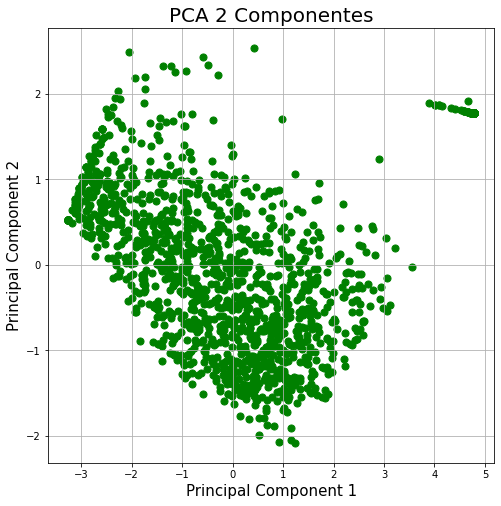

In [12]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
colors = ['r', 'g','b']
ax.set_title('PCA 2 Componentes', fontsize = 20)
ax.scatter(df['pc1'], df['pc2'], c = "green", s = 50)
ax.grid()


## KMeans

In [13]:
X_1 = np.array(short_data)

In [14]:
X_1

array([[ 85,  30,  60,  60,  40,  70],
       [100,  20,  30,  50,  35, 100],
       [ 80, 100,  80, 100, 100,  80],
       ...,
       [ 95,  50, 100,  75, 100,  80],
       [ 75,  10, 100,  30, 100,  30],
       [ 45,  80,  75,  95,  80,  50]], dtype=int64)

In [15]:
#k = calculate_wcss(X)
X_1

array([[ 85,  30,  60,  60,  40,  70],
       [100,  20,  30,  50,  35, 100],
       [ 80, 100,  80, 100, 100,  80],
       ...,
       [ 95,  50, 100,  75, 100,  80],
       [ 75,  10, 100,  30, 100,  30],
       [ 45,  80,  75,  95,  80,  50]], dtype=int64)

In [17]:
#number = optimal_number_of_clusters(k)
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(X_1, k=(4,12))

visualizer.fit(X_1)        # Fit the data to the visualizer
visualizer.show()     

YellowbrickTypeError: The supplied model is not a clustering estimator; try a classifier or regression score visualizer instead!

In [ ]:
#Número adequado de clusters para essa classificação
number

In [ ]:
kmeans = KMeans(n_clusters=6,random_state=0)
kmeans.fit(X)

In [ ]:
predict = kmeans.predict(X)
print(predict)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], X[:, 2], c=predict,
            s=100, cmap='viridis');

**Transforma as labels em uma coluna**

In [ ]:
short_data["k-classes"] = kmeans.labels_
short_data["name"] = data["name"]

In [ ]:
short_data.head(5)

## Aplicação do NLP

**Imports**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk

**Separação das colunas**

In [ ]:
text_data = data[["name","real_name","full_name","history_text","powers_text"]]
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer,CountVectorizer

In [ ]:
text_data.describe()

**Seleção de Stopwords, Remoção de Missing Data e Aplicação de Lowercase**

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
text_data = text_data.fillna('').astype(str).apply(lambda x: x.str.lower())

In [ ]:
text_data.head(5)

**Compilado das colunas de texto**

In [ ]:
text_data["comp"] = text_data["name"] + " " + text_data["real_name"] + " " + text_data["full_name"] + " " + text_data["history_text"] + " " + text_data["powers_text"]

**Vetorização e remoção de stopwords**

In [ ]:
vec = TfidfVectorizer(stop_words=stopwords)
vec.fit(text_data.comp.values)
features = vec.transform(text_data.comp.values)

**Predição por K-Means**

In [ ]:
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=1000, tol=0.0001, precompute_distances=True, verbose=0, random_state=None, n_jobs=1)
km.fit(features)
predicted = km.predict(features)

In [ ]:
predicted

In [ ]:
from sklearn.decomposition import PCA
clusters = km.predict(features)
pca = PCA(n_components=2)
two_dim = pca.fit_transform(features.todense())
scatter_x = two_dim[:, 0] 
scatter_y = two_dim[:, 1] 

**Plot dos dados com as cores de clusters**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

fig, ax = plt.subplots()
fig.set_size_inches(20,10)

cmap = {0: 'green', 1: 'blue', 2: 'red'}

for group in np.unique(clusters):
    ix = np.where(clusters == group)
    ax.scatter(scatter_x[ix], scatter_y[ix], c=cmap[group], label=group)

ax.legend()
plt.xlabel("PCA 0")
plt.ylabel("PCA 1")
plt.show()

In [ ]:
text_data["k-classes"] = predicted

In [ ]:
text_data.head(5)

In [ ]:
data_comp = pd.DataFrame(columns = ['nlp', 'nbr']) 
data_comp["nlp"] = text_data["k-classes"]
data_comp["nbr"] = short_data["k-classes"]

In [ ]:
data_comp.head(5)

## KMeans normalizado e com colunas de Numéricas

In [ ]:
from sklearn import preprocessing
df = data.copy()
df = df.select_dtypes(['number'])
df.head(5)

In [ ]:
df = df.fillna(0)
x_array = np.array(df)
x_array.shape

**Normalização dos Dados**

In [ ]:
normalized_X = preprocessing.normalize(x_array)

In [ ]:
normalized_X

In [ ]:
k2=calculate_wcss(normalized_X)

**Número ideal de clusters**

In [ ]:
number = optimal_number_of_clusters(k2)
number

In [ ]:
kme = KMeans(n_clusters=6,random_state=0)
kme.fit(normalized_X)

In [ ]:
predicted2 = kme.predict(normalized_X)
predicted2

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=predicted2,
            s=100, cmap='viridis');